<font size=4 color='cornflowerblue'>
    
 # Improving Deep Neural Network


<font size=4 color='rosybrown'>
    
> ## Hyperparameter tuning

<font size=4>
    
Para escoger a los hiperparametros en un modelo, como son

    el numero de capas ocultas (intermedias), 

    el numero de nodos en cada capa oculta, 

    la tasa de aprendizaje, 

    las funciones de activacion para cada capa oculta, 

etcetera, se debe seguir un proceso iterativo para elegirlos 'correctamente'. 


<font size=4 color='rosybrown'>
    
>> ### Train, development and test sets

<font size=4>
    
  <img src="iter.png" width=600 height=600 align = "midle" >     

Para implementar un modelo de machine learning, el conjunto de datos se debe repartir en tres conjuntos:

| Train | Development | Test |
| --- | --- | --- |
| se usa para entrenar | se usa para validar la | se usa para probar |
| al modelo | arquitectura del modelo entrenado | al modelo entrenado |


Tanto el conjunto de entrenamiento (train) como el de validacion o development (dev) se usan en el proceso de entrenamiento del algoritmo, la diferencia entre estos es que es con el conjunto de train con el que se 'aprenden' (se encuentran los pesos y biases optimos, es decir, los que minimizan a la funcion de costo) a los parametros, una vez que se tienen los parametros, el modelo realiza una evaluacion sobre el conjunto dev. 


Surge una primera pregunta: **¿Qué proporcion de datos se va a usar para cada conjunto?**

1. El *conjunto de entrenamiento* tiene que ser el mas numeroso porque es con estos datos que el algortmo va a generar una funcion que 'aprenda' a relacionar a los datos que estamos interesados en correlacionar. 

2. El *conjunto de validacion* debe seguir un comportamiento similar al conjunto de entrenamiento, por lo que tienen que ser suficientes. 'suficiente' dependera de la cantidad de datos que tenga el conjunto original. 

3. El *conjunto de prueba* es mas pequeño, pues este se usara solo para probar al modelo, es decir, una vez entrenado este, queremos ver, con datos que nunca ha visto el modelo, qué tan bien aprendio. 

<img src="traindevtest.png" width=600 height=600 align = "midle" >     


Por lo general, los conjuntos de validacion y de prueba tienen la misma cantidad de muestras. 

**Ejemplo**

Si tenemos 100 muestras, 70 de ellas se usaran para entrenar al modelo, 15 para validarlo y el resto para probarlo. Supongamos que los datos corresponden a la altura de cien personas. Si realizamos el histograma de las 70 muestras de entrenamiento, observaremos que parecen seguir una distribucion gaussiana:


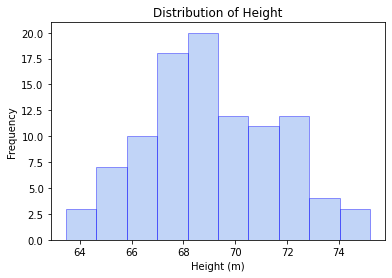

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('weight-height.csv')
df_1 = df[:100]
df_2 = df[:15]
# Histogram of the height
df_1.Height.plot(kind='hist',color='cornflowerblue',edgecolor='b', alpha=0.4)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Frequency');

<font size=4>
    
¿Qué pasa si realizamos el histograma de las 15 muestras de validacion?, dificilmente, al tratarse de tan pocos datos, se lograra ver una distribucion gaussiana:

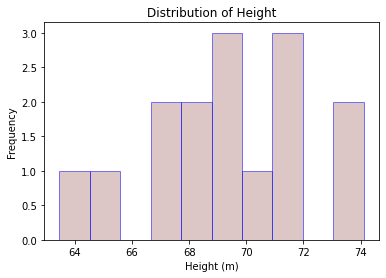

In [2]:
# Histogram of the height
df_2.Height.plot(kind='hist',color='rosybrown',edgecolor='b', alpha=0.5)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Frequency');

<font size=4>

Es por eso que la cantidad de muestras para cada conjunto depende del numero de muestras que se tenga en total, cuidando siempre que el conjunto de validacion sea suficiente para que tenga un comportamiento parecido al del conjunto de entrenamiento. 

Una segunda pregunta podria ser: **¿De dónde provienen los conjuntos de datos?**

Dado que estamos interesados en que un modelo aprenda, queremos que este generalice bien. Un ejemplo, si doy pares de numeros: n y m ,con n y m entre 0 y 100, y quiero que el modelo aprenda a multiplicar esos pares de numeros, nos gustaria que tambien aprenda a multiplicar pares de numeros mas grandes que 100, es decir, a partir de la informacion que le dimos queremos que esta aprenda a generalizar la operacion de producto binario. 

*Una practica recomendada es que los conjuntos de validacion y de prueba provengan de la misma distribucion*, y que esta sea diferente a la distribucion del conjunto de entrenamiento. De esta manera, podemos saber si el modelo que aprendio con el conjunto train es capaz de generalizar lo aprendido, es decir, si lo hara bien para el conjunto dev. 
___


<font size=4 color='rosybrown'>
    
>> ### Bias and variance

<font size=4>
    
[A high-bias, low-variance introduction to Machine Learning for physicists](https://arxiv.org/abs/1803.08823) pp 10-13

Suponiendo que se desea separar las *x* de los *o* podemos hacer las siguientes observaciones:

<img src="bias.png" width=600 height=600 align = "midle" >     


1. Izquierda: Si ajustas una línea recta a los datos, tal vez conseguirás una regresión logística ajustada a eso.
Esto no es un muy buen ajuste a los datos.
Y esto tiene un bias elevado.


2. Derecha: si ajustas un clasificador increíblemente complejo, tal vez una red neuronal profunda, o una red neuronal con muchas unidades ocultas, tal vez puedas ajustar perfectamente los datos, pero eso tampoco parece ser un gran ajuste.
Es un clasificador de alta varianza y esto ocasiona un sobre ajuste (**overfitting**) a los datos.


3. Centro: Podría haber algún clasificador en el medio, con un nivel medio de complejidad, que tal vez se ajusta correctamente. 


En un ejemplo 2D como este, con solo dos características, X-1 y X-2, puedes trazar los datos y visualizar el sesgo y la varianza. En problemas de alta dimensión, no puedes trazar los datos y visualizar el límite de la división.


En cambio, hay un par de métricas para tratar de entender el sesgo y la varianza: 



    el error del conjunto de entrenamiento (*train error*) y 


    el error en el conjunto de desarrollo (*error dev*). 


**Ejemplo**

Supongamos que tenemos los siguientes resultados:



| error train | error dev | diagnosis |
| --- | --- | --- |
| 1% | 11% | High variance |
| 15% | 16% | High bias |
| 15% | 30% | High Bias & variance |
| 0.5% | 1% | loss Bias & variance |

1. En el ejemplo del primer renglon, lo estás haciendo muy bien en el conjunto de entrenamiento, pero estás haciéndolo relativamente mal en el conjunto de desarrollo. Así que este algoritmo parece que podría haber sobre ajustado (*overfitting*) el conjunto de entrenamiento pues no está generalizando correctamente al conjunto de validación. 

Si tienes un ejemplo como este, decimos que esto tiene una varianza alta.


2. Ahora, digamos que mides tu error en el conjunto de entrenamiento y en el de desarrollo, y obtienes un resultado diferente (renglon dos). Digamos que el error de entrenamiento es del 15% y tu error en el conjunto de desarrollo es 16%.
En este caso, suponiendo que los humanos logran un error de aproximadamente 0%, entonces parece que el algoritmo ni siquiera está funcionando muy bien en el conjunto de entrenamiento.

Este algoritmo tiene un alto sesgo. 

Pero en contraste, esto se generaliza bien a un nivel razonable para el conjunto de desarrollo, mientras que el rendimiento en el conjunto de desarrollo es solo un 1% peor que el rendimiento en el conjunto de entrenamiento.


3. En el renglon tres tienes un 15% de error de entrenamiento, así que hay un sesgo bastante alto, pero cuando evalúas el conjunto de dev, lo hace aún peor, tal vez lo hace el 30%.

En este caso, diagnosticaría que este algoritmo tiene un alto sesgo, porque no lo está haciendo tan bien en el conjunto de entrenamiento, y además tiene alta varianza.


4. Y un último ejemplo, si tiene un error de conjunto de entrenamiento 0.5%, y 1% de error en desarrollo, se tiene un sesgo bajo y una varianza baja.



Este análisis se basa en el supuesto de que el rendimiento a nivel humano tiene casi un 0% de error o, más en general, que el error óptimo (error de Bayes) es casi el 0%.

Si el error óptimo o el error de Bayes fueran mucho más altos, digamos, si fuera del 15%, entonces si nos fijamos en este clasificador, 15% es en realidad perfectamente razonable para el conjunto de entrenamiento y tú
no lo verías como un alto sesgo. 

Así que el caso de cómo analizar el sesgo y la varianza, cuando ningún clasificador funciona muy bien, por ejemplo, si tienes imágenes borrosas, de modo que incluso un sistema humano o simplemente ningún sistema podría hacerlo muy bien, entonces tal vez el error de Bayes es mucho mayor, y hay algunos detalles de cómo cambiará este análisis.

___

**Resumen**


1. Observar *error train* (¿el algoritmo se ajusta bien con los datos de entrenamiento?), esto indica si hay un problema de sesgo. 


2. Observar *error dev* (¿generaliza bien desde el conjunto de entrenamiento al conjunto de validacion?) indica si hay un problema con la varianza. 


Todo esto bajo el supuesto de que el error de Bayes es bastante pequeño y que los conjuntos de entrenamiento y desarrollo se extraen de la misma distribución.


Dependiendo de si tu algoritmo sufre de sesgo o varianza, hay diferentes cosas que puedes probar para arreglarlo.
___

<font size=4 color='rosybrown'>
    
>> ### Basic recipe

<font size=4>

 Después de haber entrenado un modelo inicial, nos preguntamos:

1. *¿El algoritmo tiene un alto sesgo?*

Para tratar de evaluar si hay un alto sesgo, debes observar el rendimiento sobre los datos de entrenamiento.
Si tiene un alto sesgo, ni siquiera se ajusta bien el conjunto de entrenamiento.

Algunas cosas que podrías intentar serían:


    1.1 intentar escoger una red más grande: agregar más capas o más unidades por capa


    1.2 entrenarla por más tiempo.
    

    1.3 probar algunos algoritmos de optimización más avanzados.
    

Usar una red más grande casi siempre ayuda. Y entrenar por más tiempo no siempre ayuda, pero no hace daño.


2. Una vez que reduzcas el sesgo a cantidades aceptables, pregunta, *¿Hay algún problema de varianza?*

Para evaluar eso observamos el rendimiento sobre el conjunto de desarrollo.

¿Eres capaz de generalizar desde un conjunto de entrenamiento con buen rendimiento para tener un buen rendimiento en el conjunto de desarrollo?

Si tienes alta varianza, la mejor manera de resolver el problema es:

    2.1 obtener más datos.
    

    2.2 regularización
 
 
<font color='rosybrown'> 
    
 NOTAS:
 

* Conseguir una red más grande casi siempre solo reduce tu sesgo sin dañar necesariamente su varianza, siempre y cuando se regularice adecuadamente.


* Obtener mas datos casi siempre reduce tu varianza y no daña mucho tu sesgo.


* El costo principal de entrenar una red neuronal demasiado grande es solo el tiempo computacional, siempre que estés regularizando.


* Pero si puedes encontrar una arquitectura de red neuronal más apropiada, a veces eso también puede reducir tu problema de varianza, así como reducir tu problema de sesgo. 

___

<font size=4 color='rosybrown'>
    
> ## Regularization

<font size=4>

La regularización, es una técnica muy útil para reducir la varianza.

Recordemos que se usa una métrica para observar cómo va el entrenamiento en un modelo. La función de costo compara la predicción hecha por la red con el valor real al cual se quiere llegar, el objetivo es minimizar esta función, pues lo que se estaria haciendo es que la predicción y el valor real sean lo mas parecido posible. 


La función de costo se denota con J, mientras que la función de perdida se denota con L.


$$J(w, b) = \dfrac{1}{m}\Sigma_{i=1}^{m} L(y^{(i)}, \hat{y}^{(i)})$$

donde $w$ y $b$ son los parámetros que se deben encontrar de tal manera que se minimice a la función J.

Se tiene que

$$w \epsilon \Re^{n_x}, b \epsilon \Re  $$

si $w$ y $b$ son los parámetros en la capa $l$, etonces $n_x$ es el número de nodos de la capa $l-1$ y $m$ es el número de muestras. 



<img src="Red_2.png" width=1000 height=1000 align = "midle" >     

<font size=2>
    
La imagen fue realizada por Luis Fermin. 

<font size=4 color='rosybrown'>
    
>> ### L2 regularization (weight decay)

<font size=4>
    
Para agregar regularización se agrega un siguiente término a la función $J$:

$$J(w, b) = \dfrac{1}{m}\Sigma_{i=1}^{m} L(y^{(i)}, \hat{y}^{(i)}) + \dfrac{\lambda}{2m}||w||^2_{2}  $$

donde $||w||^2_{2} = w^T*w = \Sigma_{j=1}^{n_x}w_j^{2}$


$\lambda$ se denomina parámetro de regularización

El término adicional penaliza a las matrices de peso por ser demasiado grandes. 


 ¿por qué regulariza solo el parámetro w?, ¿Por qué no añadimos algo aquí también sobre b?
 
 
Si miras tus parámetros, w suele ser una dimensión bastante alta, especialmente con un problema de alta varianza.
Tal vez w solo tiene muchos parámetros, entonces no está ajustando todos los parámetros bien, mientras que b es solo un número. Así que casi todos los parámetros están en w en lugar de b.
Y si agrega este último término, en la práctica, no hará mucha diferencia porque b es solo un parámetro sobre un número muy grande de parámetros.




<font color='rosybrown'>
NOTA:

lambda es un hiper-parámetro, es decir, es un parámetro que hay que ajustar.
<font color='black'>


Generalizando la ecuación anterior para redes neuronales:

$$J(w^{[1]}, b^{[1]}, ..., w^{[L]}, b^{[L]}) = \dfrac{1}{m}\Sigma_{i=1}^{m} L(y^{(i)}, \hat{y}^{(i)}) + \dfrac{\lambda}{2m}||w||^2_{F}$$

donde $||w||^2_{F}$ es la norma de Frobenius y L es el número de capas en la red (el número de capas ocultas mas la capa de salida). 

Recordemos que la actualización de los parámetros esta dada por:

$$w^{[l]} = w^{[l]} - \alpha \dfrac{\partial J}{\partial w^{[l]}}$$

dado que ahora la función de costo tiene un término mas, la derivada es:

$$\dfrac{\partial J}{\partial w^{[l]}} = x + \dfrac{\lambda}{m}w^{[l]} $$

donde x es la derivada de la función de costo sin agregar el término de regularización.

La actualización de los parámetros será:

$$w^{[l]} = w^{[l]} - \alpha ( x + \dfrac{\lambda}{m}w^{[l]})$$


esto es:

$$w^{[l]} = (1-\dfrac{\alpha \lambda}{m})w^{[l]} - \alpha x$$

observa que el termino $(1-\dfrac{\alpha \lambda}{m})$ es menor que 1 por lo que la matriz de pesos $w^{[l]}$ se esta multiplicando por un término pequeño. 

<font size=4 color='rosybrown'>
    
>> ### L1 regularization

<font size=4>

La funcion de costo J, se modifica por:


$$J(w, b) = \dfrac{1}{m}\Sigma_{i=1}^{m} L(y^{(i)}, \hat{y}^{(i)}) + \dfrac{\lambda}{2m}|w|_1  $$

donde $|w|_1  = \Sigma_{j=1}^{n_x}|w_j|$



Si usas la regularización L1, entonces w terminará siendo escaso, lo que eso significa es que el vector w tendrá muchos ceros.


Algunas personas dicen que esto puede ayudar a comprimir el modelo, porque el conjunto de parámetros es cero, y necesita menos memoria para almacenar el modelo.

___

<font size=4>
    
**¿Por qué la regularizacion disminuye el overfitting?**
    
1. Si la regularización hace que $\lambda$ sea realmente, muy grande, los modelos estarán incentivados a establecer matrices de peso W que estén razonablemente cerca de cero.

Una parte de la intuición es que tal vez establece que el peso sea tan cercano a cero para una gran cantidad de unidades ocultas (que es básicamente cero) y el impacto de estas unidades ocultas es nulo.

Si ese es el caso,entonces esta red neuronal mucho más simplificada se convierte en una red neuronal mucho más pequeña.

En la práctica esto no es en realidad lo que sucede.

La intuición de reducir completamente a cero un grupo de unidades ocultas no es del todo correcta.

Resulta que lo que realmente sucede es que todavía usarás todas las unidades ocultas, pero cada una de ellos tendría un efecto mucho menor.

Terminas con una red más simple y será como si tuvieras una red más pequeña que, por lo tanto, es menos propensa al sobreajuste.

2. Por otro lado para varias de las funciones f(x) de activacion que se usan en ML se tiene que para valores pequeños de x, f(x) se aproxima bien a una recta (por ejemplo sigmoid o tanh). 

<img src="sigmoid.png" width=450 height=450 align = "left" >     
<img src="tanh.png" width=500 height=500 align = "right" >     




<font size=4>

Si $\lambda$ es grande, entonces w es pequeño y por tanto z ($x*w+b$) sera un numero pequeño. 


Es como si cada capa fuera aproximadamente lineal.
Y por tanto, no es capaz de ajustarse a un problema de decisión muy complicado, no hay sobreajuste.


Y así, toda tu red neuronal estará computando algo no muy lejos de una gran función lineal que por lo tanto es una función bastante simple en lugar de una función altamente no lineal altamente compleja.
Y también es mucho menos capaz de sobre ajustarse.


<font size=4 color='rosybrown'>
    
>> ### Dropout regularization


<font size=4>
    
 Otra técnica de regularización es el dropout.
 

Con dropout, lo que vamos a hacer es ir a través de cada una de las capas de la red se asaigna cierta probabilidad de eliminar un nodo de la red neuronal.


<img src="dropout.gif" width=600 height=600 align = "midle" >     


Digamos que para la segunda capa oculta, vamos a -para cada nodo- lanzar una moneda y tendremos una probabilidad de 0.5 de mantener cada nodo y 0.5 de eliminarlo.

Después de lanzar las monedas, tal vez decidiremos eliminar esos nodos, entonces lo que harás es remover también todas las conexiones que entran y salen de ese nodo.

Así que terminas con una red mucho más pequeña. 
Y luego en diversos ejemplos, vuelves a lanzar monedas y mantendrás un conjunto de nodos diferente y abandonarás o eliminarás otros distintos.
Y así, por cada ejemplar de entrenamiento, realizarías el entrenamiento sobre alguna de estas redes reducidas.



Entonces, no es que para un ejemplo debas mantener a cero las mismas unidades ocultas, es que, en la iteración uno de descenso por gradiente puedes poner a cero algunas unidades ocultas.
Y en la segunda iteración del descenso por gradiente donde vas a través del conjunto de entrenamiento la segunda vez, tal vez puedas poner a cero un patrón diferente de unidades ocultas. 


Ahora, habiendo entrenado el algoritmo, en el momento de la prueba, esto es lo que harías.

En el momento de la prueba, le das una x o la que desea hacer una predicción.
Y usando nuestra notación estándar:

$x = a^0$,

las activaciones de la capa cero para denotar solo el ejemplo de prueba x.

Entonces, lo que vamos a hacer es no usar dropout en el momento de la prueba, en particular, que será

$z ^ 1 = w ^ 1.a ^ 0 + b ^ 1$

$a ^ 1 = g ^ 1 (z ^ 1)$

$z ^ 2 = w ^ 2.a ^ 1 + b ^ 2$

$a ^ 2 = ...$

Hasta que llegues a la última capa y hagas una predicción $y^$.

Pero nota que en tiempo de prueba que no estás usando dropout explícitamente y no estás lanzando monedas al azar, no estás lanzando monedas para decidir qué unidades ocultas eliminar.
Y eso es porque cuando estás haciendo predicciones en el momento de la prueba, no quieres que tu salida sea aleatoria.
Si está implementando el dropout en el momento de la prueba, Eso solo añade ruido a tus predicciones.
En teoría, una cosa que podrías hacer es ejecutar un proceso de predicción muchas veces, con diferentes unidades ocultas retiradas al azar y promediar.
Pero eso es computacionalmente ineficiente y le dará aproximadamente el mismo resultado.
El efecto de eso fue asegurar que incluso cuando no se implementa dropout en el momento de prueba para escalar,
El valor esperado de estas activaciones no cambia.
Por lo tanto, no es necesario agregar un parámetro raro de escalado adicional en el tiempo de prueba.


**¿Porqué funciona?**


Es como si en cada iteración estuvieras trabajando con una red neuronal más pequeña, y así, el uso de una red neuronal más pequeña parece que debería tener un efecto de regularización.


Una segunda intuición que es, echémosle un vistazo a esto desde la perspectiva de una sola unidad. 

Ahora, para que esta unidad haga su trabajo en cuanto a las entradas, necesita generar algún resultado significativo.
Ahora con dropout, las entradas pueden ser eliminadas al azar. A veces estas dos unidades serán eliminadas,
a veces una unidad diferente será eliminada.
Entonces, lo que esto significa es que esta unidad, no se puede confiar en ninguna característica porque cualquier característica podría desaparecer al azar o cualquiera de sus entradas podría desaparecer al azar.


El efecto de implementar dropout es que se reducen los pesos.

<font size=4 color='rosybrown'>
    
>> ### Data Augmentation

<font size=4>
    

Obtener más datos de entrenamiento puede ayudar, pero obtener más los datos de capacitación pueden ser costosos y, a veces, simplemente no puede obtener más datos.

Lo que puedes hacer es aumentar tu conjunto de entrenamiento tomando una imagen por ejemplo y voltearla horizontalmente.

  <img src="dataaug.png" width=600 height=600 align = "midle" >     


Así que ahora, en lugar de este único ejemplo en tu conjunto de entrenamiento, puedes agregar esto a tu ejemplo de entrenamiento.

Así que al voltear las imágenes horizontalmente, podría duplicar el tamaño de su conjunto de entrenamiento.
Debido a que el conjunto de entrenamiento ahora es un poco redundante, esto no es tan bueno como si tuviera un conjunto adicional de nuevos ejemplos independientes.

También puedes voltear horizontalmente, tomar secciones aleatorias de la imagen, rotar y hacer una especie de zoom aleatorio en la imagen, conservando que bajo las transformaciones todavía parezca un gato.


<font size=4 color='rosybrown'>
    
>> ### Early stopping

<font size=4>
    
   <img src="early.png" width=600 height=600 align = "midle" >     

    
Si se encuentra que el error de su conjunto de validación se reduce por un tiempo, y después aumenta a partir de un punto.
Entonces, se detiene el entrenamiento en ese punto.

Parece que tu red neuronal estaba haciendo lo mejor posible en esa iteración, por lo que solo queremos dejar de operar en su red neuronal a mitad de camino y tomar cualquier valor alcanzado para el error en el conjunto de desarrollo.


¿por qué funciona esto?
Bueno, cuando no has corrido muchas iteraciones para la red neuronal todavía sus parámetros w estarán cerca de cero.


Porque con la inicialización aleatoria probablemente inicialice w a pequeño aleatorio los valores, así que antes de entrenar por mucho tiempo, w todavía es bastante pequeño.

Y a medida que recorra, mientras entrena, creceremos más y más y más hasta que quizás tenga un valor mucho mayor de los parámetros w para su red neuronal.


Y el término detención anticipada se refiere al hecho de que solo detienes el entrenamiento de su red neuronal antes.

<font size=3 color='rosybrown'>

NOTA:

Estas notas estan basadas en el curso 2 de la especializacion de Deep Learning impartida por Andrew NG en la plataforma de Coursera.